In [157]:
import pandas as pd
import numpy as np
import pickle
import robot
from da_test_suite_functions import *
import seaborn as sb
import matplotlib.pyplot as plt
from acin_colors import acin_colors
from scipy.spatial.transform import Rotation as R

In [158]:
# import observations from file

# select observations file
observations_file_select = 38
observations_file_str_dict = {1: r'observation_files/obs_exp_26_04_002_2024-04-26-12-06-53_20240426-123809.p',
                              37: r'observation_files/meas_err/observations_simulated_errors__r_0.00070__t_0.00000.p',
                              38: r'observation_files/meas_err/observations_simulated_errors__r_0.00080__t_0.00000.p',
                              60: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00000.p',
                              61: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00010.p',
                              62: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00020.p',
                              63: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00030.p',
                              64: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00040.p',
                              65: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00050.p',
                              66: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00060.p',
                              67: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00070.p',
                              68: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00080.p',
                              69: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00090.p',
                              99: r'observations_simulated_20240503_185815.p'}

observations_file = open(observations_file_str_dict[observations_file_select], 'rb')
observations = pickle.load(observations_file)
observations_file.close()
print(observations.keys())

Index(['marker_id', 'mat', 't', 'q', 'interp_dist'], dtype='object')


In [159]:
df = pd.DataFrame()
df['marker_id'] = observations['marker_id']
df['marker_loc'] = get_marker_locations(observations)
df['x'] = [loc[3] for loc in df['marker_loc']]
df['y'] = [loc[4] for loc in df['marker_loc']]
df['z'] = [loc[5] for loc in df['marker_loc']]
df['r1'] = [loc[0] for loc in df['marker_loc']]
df['r2'] = [loc[1] for loc in df['marker_loc']]
df['r3'] = [loc[2] for loc in df['marker_loc']]

# convert to euler
records_euler = df.to_dict('records')
for rec in records_euler:
    r = R.from_rotvec([rec['r1'], rec['r2'], rec['r3']])
    euler = r.as_euler('XYZ')
    rec['a'], rec['b'], rec['c'] = euler[0], euler[1], euler[2]
df = df.from_records(records_euler)


list_df = []
for marker_id in set(list(df['marker_id'])):
    x_mean = df[df['marker_id']==marker_id]['x'].to_numpy().mean()
    y_mean = df[df['marker_id']==marker_id]['y'].to_numpy().mean()
    z_mean = df[df['marker_id']==marker_id]['z'].to_numpy().mean()
    a_mean = df[df['marker_id']==marker_id]['a'].to_numpy().mean()
    b_mean = df[df['marker_id']==marker_id]['b'].to_numpy().mean()
    c_mean = df[df['marker_id']==marker_id]['c'].to_numpy().mean()
    df_records = df[df['marker_id']==marker_id].to_dict('records')
    for rec in df_records:
        rec['x'] = rec['x']-x_mean
        rec['y'] = rec['y']-y_mean
        rec['z'] = rec['z']-z_mean
        rec['a'] = rec['a']-a_mean
        rec['b'] = rec['b']-b_mean
        rec['c'] = rec['c']-c_mean
        list_df.append(rec)


df_records = pd.DataFrame.from_records(list_df)

In [160]:
x, y, z = df_records['x'].to_numpy(), df_records['y'].to_numpy(), df_records['z'].to_numpy()
a, b, c = df_records['a'].to_numpy(), df_records['b'].to_numpy(), df_records['c'].to_numpy()

std_x = 0.000000
std_y = 0.000000
std_z = 0.000000


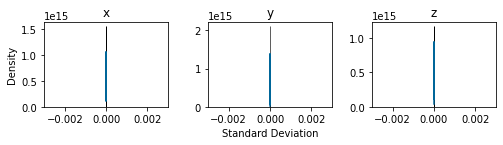

In [161]:
width = 18/2.54
fig, axs = plt.subplots(1,3, figsize=(width, 0.3*width))

sb.histplot(x, kde=True, stat="density", color=acin_colors['blue'], ax=axs[0])
axs[0].set_title('x')
axs[0].set_xlim([-3e-3, 3e-3])

sb.histplot(y, kde=True, stat="density", color=acin_colors['blue'], ax=axs[1])
axs[1].set_title('y')
axs[1].set_xlim([-3e-3, 3e-3])
axs[1].set_ylabel('')
axs[1].set_xlabel('Standard Deviation')

sb.histplot(z, kde=True, stat="density", color=acin_colors['blue'], ax=axs[2])
axs[2].set_title('z')
axs[2].set_xlim([-3e-3, 3e-3])
axs[2].set_ylabel('')

plt.tight_layout()


for coor in ['x', 'y', 'z']:
    std = np.std(df_records[coor])
    print(f"std_{coor} = {std:.6f}")

std_a = 0.000597
std_b = 0.000629
std_c = 0.000688


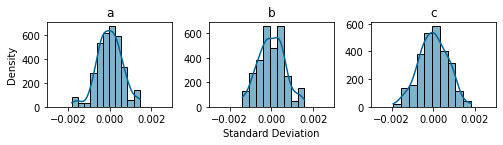

In [162]:
fig, axs = plt.subplots(1,3, figsize=(width, 0.3*width))

sb.histplot(a, kde=True, stat="density", color=acin_colors['blue'], ax=axs[0])
axs[0].set_title('a')
axs[0].set_xlim([-3e-3, 3e-3])

sb.histplot(b, kde=True, stat="density", color=acin_colors['blue'], ax=axs[1])
axs[1].set_title('b')
axs[1].set_xlim([-3e-3, 3e-3])
axs[1].set_ylabel('')
axs[1].set_xlabel('Standard Deviation')

sb.histplot(c, kde=True, stat="density", color=acin_colors['blue'], ax=axs[2])
axs[2].set_title('c')
axs[2].set_xlim([-3e-3, 3e-3])
axs[2].set_ylabel('')

plt.tight_layout()


for coor in ['a', 'b', 'c']:
    std = np.std(df_records[coor])
    print(f"std_{coor} = {std:.6f}")